# Modele generatywne w zastosowaniach obrazu 2D i 3D

### Plan opracowania
1. Wprowadzenie do modeli generatywnych
2. Zadanie generowania i dogenerowywania fragmentów obrazów
3. Modele generatywne w grafice 2D
4. Modele generatywne w grafice 3D

## Modele Generatywne

### Definicja
> Generative AI models can take inputs such as text, image, audio, video, and code and generate new content into any of the modalities mentioned. \
> For example, it can turn text inputs into an image, turn an image into a song, or turn video into text. \
> -- <cite>[Nvidia](https://www.nvidia.com/en-us/glossary/generative-ai/#:~:text=Generative%20AI%20models%20can%20take,or%20turn%20video%20into%20text.)</cite>

Modele generatywne to rodzaj algorytmów uczenia maszynowego, które uczą się generować nowe dane na wzór danych treningowych. \
W przeciwieństwie do modeli dyskryminacyjnych, które klasyfikują lub przewidują wartości, modele generatywne są zaprojektowane do tworzenia nowych przykładów.

### Rodzaje modeli generatywnych
#### Generative Adversarial Networks (GANs) (2)

![GANs](./images/gan_diagram.svg)
Źródło: [Google Developers](https://developers.google.com/machine-learning/gan/gan_structure?hl=pl)

Modele te składają się z dwóch sieci neuronowych:
- Generator: Tworzy nowe dane.
- Dyskryminator: Rozróżnia dane prawdziwe (z danych treningowych) od wygenerowanych (przez generator).

Trening GAN polega na „grze” między generatorem i dyskryminatorem:
- Celem generatora jest wyprodukowanie danych, które są trudne do odróżnienia od prawdziwych.
- Celem dyskryminatora jest rozróżnienie prawdziwych danych od wygenerowanych.

Po odpowiednim treningu generator produkuje dane, które są trudne do odróżnienia od prawdziwych.

#### Variational Autoencoders (VAEs) (3,4)
VAE są modelami generatywnymi wykorzystywanymi do generowania nowych danych w formie wariacji danych wejściowych, na których zostały wytrenowane.


VAE składają się z dwóch sieci neuronowych:
- Encoder: Mapuje dane wejściowe na przestrzeń latentną.
- Decoder: Mapuje dane z przestrzeni latentnej na dane wyjściowe.


### Modele dyfuzyjne (5)
Modele dyfuzyjne to generatywne modele, które uczą się odtwarzać dane, odwracając proces stopniowego dodawania szumu do danych (proces dyfuzji).

Proces uczenia modelu dyfuzyjnego składa się z dwóch etapów:
- Proces do przodu: Stopniowe dodawanie szumu do danych aż do ich pełnego zaszumienia (losowy szum).
- Proces odwrotny: Odszumianie krok po kroku przy użyciu modelu (np. UNet), aby odzyskać pierwotne dane.

Model jest trenowany na rzeczywistych danych, optymalizując różnicę między zaszumionymi danymi a ich rekonstrukcją - uczy się przewidywać rozkład danych na każdym etapie procesu.

## Zadanie generowania i dogenerowywania obszarów

### Image inpainting

Image inpainting to technika w obszarze przetwarzania obrazów, której celem jest uzupełnianie brakujących fragmentów obrazu lub usuwanie niepożądanych elementów w sposób, który jest wizualnie spójny z otoczeniem.

Proces inpaintingu opiera się na analizie dostępnych informacji w obrazie (np. kolorów, tekstur, krawędzi) i ich wykorzystaniu do uzupełnienia brakujących obszarów.

#### Podstawowe kroki inpaintingu:
1. Zidentyfikowanie brakujących obszarów: Oznaczenie fragmentów obrazu, które wymagają rekonstrukcji (np. maskowanie uszkodzonych miejsc).
2. Analiza kontekstu: Algorytm bada otaczające obszary w celu zrozumienia wzorców, które mają zostać uzupełnione.
3. Uzupełnianie braków: Wykorzystanie technik interpolacji, kopiowania pikseli, syntezy tekstur lub generatywnego modelowania, aby uzupełnić brakujące miejsca.


#### Klasyczne metody inpaintingu:
- Interpolacja: Uzupełnianie brakujących obszarów na podstawie sąsiednich pikseli.
- Kopiowanie pikseli: Kopiowanie pikseli z obszarów referencyjnych.

In [ ]:
%pip install numpy opencv-python matplotlib

*Import niezbędnych bibliotek*

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

*Definicja funkcji do prezentacji wyników inpaintingu*

In [82]:
def display_images(original, mask, result):
    plt.figure(figsize=(20, 5))

    plt.subplot(1, 4, 1)
    plt.title("Oryginalny obraz")
    plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.subplot(1, 4, 2)
    plt.title("Maska")
    plt.imshow(mask, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 4, 3)
    plt.title("Obraz z maską")
    masked = original.copy()
    masked[mask == 255] = [255, 255, 255]
    plt.imshow(cv2.cvtColor(masked, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.subplot(1, 4, 4)
    plt.title("Odtworzony obraz")
    plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.show()


In [51]:
def ordinary_inpainting(original, mask):
    return  cv2.inpaint(original, mask, inpaintRadius=3, flags=cv2.INPAINT_TELEA)

In [52]:
original_image = cv2.imread('images/inpainting_04.jpg')

image_center = (original_image.shape[1] // 2, original_image.shape[0] // 2)
mask_size = (original_image.shape[1] // 4, original_image.shape[0] // 4)

In [ ]:
big_rectangle_mask_in_the_middle = np.zeros(original_image.shape[:2], dtype=np.uint8)
cv2.rectangle(big_rectangle_mask_in_the_middle, (image_center[0] - mask_size[0] // 2, image_center[1] - mask_size[1] // 2),
              (image_center[0] + mask_size[0] // 2, image_center[1] + mask_size[1] // 2), 255, -1)

inpaint = ordinary_inpainting(original_image, big_rectangle_mask_in_the_middle)
display_images(original_image, big_rectangle_mask_in_the_middle, inpaint)

In [ ]:
big_rectangle_mask_to_the_left = np.zeros(original_image.shape[:2], dtype=np.uint8)
cv2.rectangle(big_rectangle_mask_to_the_left, (0, 0), (mask_size[0], mask_size[1]), 255, -1)

inpaint = ordinary_inpainting(original_image, big_rectangle_mask_to_the_left)
display_images(original_image, big_rectangle_mask_to_the_left, inpaint)

In [ ]:
big_rectangle_mask_in_the_corner = np.zeros(original_image.shape[:2], dtype=np.uint8)
cv2.rectangle(big_rectangle_mask_in_the_corner, (0, original_image.shape[0] - mask_size[1]), 
                (mask_size[0], original_image.shape[0]), 255, -1)

inpaint = ordinary_inpainting(original_image, big_rectangle_mask_in_the_corner)
display_images(original_image, big_rectangle_mask_in_the_corner, inpaint)

In [ ]:
small_rectangle_mask_on_the_side = np.zeros(original_image.shape[:2], dtype=np.uint8)
cv2.rectangle(small_rectangle_mask_on_the_side, (0, 0), (mask_size[0] // 2, mask_size[1]), 255, -1)

inpaint = ordinary_inpainting(original_image, small_rectangle_mask_on_the_side)
display_images(original_image, small_rectangle_mask_on_the_side, inpaint)

### Zadanie 1 (Obowiązkowe): Implementacja prostego algorytmu inpaintingu
Twoim zadaniem jest zaimplementowanie własnego, prostego algorytmu do rekonstrukcji brakujących fragmentów obrazu. 
W tym ćwiczeniu skoncentrujesz się na uzupełnianiu brakujących obszarów przy użyciu techniki interpolacji sąsiadujących pikseli.

Szczegóły:
1. Wczytaj obraz oraz maskę wskazującą brakujące obszary.
2. Zaimplementuj prosty algorytm inpaintingu:
3. Dla każdego piksela w brakującym obszarze (oznaczonym przez maskę):
4. Zamień wartość piksela na średnią wartość jego sąsiednich pikseli, które nie są częścią maski.
5. Wyświetl wynik na podstawie wypełnionych braków.

Kod początkowy:

In [87]:
def simple_inpaint(image, mask):
    """
    Prosty algorytm inpaintingu: zastąp brakujące piksele średnią sąsiednich pikseli.
    """
    result = image.copy()

    for i in range(1, image.shape[0] - 1):
        for j in range(1, image.shape[1] - 1):
            if mask[i, j] == 255:
                result[i, j] = (image[i - 1, j] + image[i + 1, j] + image[i, j - 1] + image[i, j + 1]) // 4

    return result

In [ ]:
simple_inpainting = simple_inpaint(original_image, big_rectangle_mask_in_the_middle)
display_images(original_image, big_rectangle_mask_in_the_middle, simple_inpainting)

## Inpainting z wykorzystaniem modeli generatywnych

W celu uzyskania bardziej zaawansowanych rezultatów w inpaintingu, można wykorzystać modele generatywne, które uczą się generować nowe, spójne z otoczeniem fragmenty obrazu.

#### Jak działa inpainting z wykorzystaniem modeli generatywnych?
- Użytkownik dostarcza obraz z oznaczonymi brakującymi fragmentami (np. maską, która wskazuje obszary do uzupełnienia).
- Model analizuje kontekst (otaczające piksele, strukturę i teksturę obrazu) w celu przewidzenia brakujących informacji.

Wynikiem jest obraz, w którym brakujące obszary zostały wypełnione w sposób wizualnie spójny.

In [ ]:
%pip install diffusers transformers 

In [ ]:
from diffusers import StableDiffusionInpaintPipeline
import torch
from PIL import Image
from diffusers.pipelines.stable_diffusion import safety_checker

# Załaduj pretrenowany model
pipe = StableDiffusionInpaintPipeline.from_pretrained(
    "runwayml/stable-diffusion-inpainting", 
    torch_dtype=torch.float16
).to("cuda")

# Trick wyłączający sprawdzanie bezpieczeństwa
def sc(self, clip_input, images) : return images, [False for i in images]
safety_checker.StableDiffusionSafetyChecker.forward = sc


# Załaduj obraz i maskę
image = Image.open("images/inpainting_05.png").convert("RGB")
mask = Image.open("images/inpainting_05_mask.png").convert("RGB")  # Czarny: obszar do wypełnienia

# Wypełnianie brakującego obszaru
result = pipe(prompt="Face of a yellow cat, high resolution, sitting on a park bench", image=image, mask_image=mask).images[0]

# Zapis lub wyświetlenie wyniku
result.save("images/inpainted_image.jpg")
result.show()

### Wykorzystanie GAN-ów do inpaintingu

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torchvision.utils import save_image
import random
from tqdm import tqdm

In [32]:
class MaskedFashionMNIST(torch.utils.data.Dataset):
    def __init__(self, train=True):
        transform = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize((0.5,), (0.5,))
        ])
        self.dataset = datasets.FashionMNIST(root="./data", train=train, download=True, transform=transform)

    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, idx):
        img, _ = self.dataset[idx]
        mask = torch.ones_like(img)
        
        size = np.random.randint(10, 14)
        x, y = np.random.randint(0, 28 - size, size=2)
        
        mask[:, x:x+size, y:y+size] = 0
        masked_img = img * mask
        
        return masked_img, img, mask

In [3]:
batch_size = 64

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

dataloader = torch.utils.data.DataLoader(
    datasets.FashionMNIST('./data', train=True, download=True, transform=transform),
    batch_size=batch_size, shuffle=True
)

In [5]:
class GeneratorInpaint(nn.Module):
    def __init__(self):
        super(GeneratorInpaint, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(2, 64, 3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(64, 128, 3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 1, 3, stride=1, padding=1),
            nn.Tanh()
        )
    
    def forward(self, masked_image, mask):
        x = torch.cat((masked_image, mask), dim=1)
        return self.model(x)

In [6]:
class DiscriminatorInpaint(nn.Module):
    def __init__(self):
        super(DiscriminatorInpaint, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(1, 64, 3, stride=2, padding=1),
            nn.LeakyReLU(0.2),
            nn.Conv2d(64, 128, 3, stride=2, padding=1),
            nn.LeakyReLU(0.2),
            nn.Flatten(),
            nn.Linear(128 * 7 * 7, 1),
            nn.Sigmoid()
        )

    def forward(self, img):
        return self.model(img)

In [7]:
def mask_images(images, mask_size):
    masked_images = images.clone()
    masks = torch.ones_like(images)
    h, w = images.shape[2], images.shape[3]
    for i in range(images.size(0)):
        x, y = random.randint(0, h - mask_size), random.randint(0, w - mask_size)
        masked_images[i, :, x:x+mask_size, y:y+mask_size] = 0
        masks[i, :, x:x+mask_size, y:y+mask_size] = 0
    return masked_images, masks

In [8]:
def save_model(generator, discriminator, path):
    torch.save(generator.state_dict(), f"{path}/generator.pth")
    torch.save(discriminator.state_dict(), f"{path}/discriminator.pth")

In [9]:
def train_inpainting_gan(generator, optimizer_G, discriminator, optimizer_D, criterion, criterion_recon, dataloader, epochs, device):
    training_progress = tqdm(range(epochs))

    for epoch in training_progress:
        for i, (images, _) in enumerate(dataloader):
            images = images.to(device)
            masked_images, masks = mask_images(images, mask_size=10)
            masked_images, masks = masked_images.to(device), masks.to(device)
            
            real_labels = torch.ones(images.size(0), 1).to(device)
            fake_labels = torch.zeros(images.size(0), 1).to(device)

            # Trening Dyskryminatora
            optimizer_D.zero_grad()
            outputs_real = discriminator(images)
            d_loss_real = criterion(outputs_real, real_labels)
            
            fake_images = generator(masked_images, masks)
            outputs_fake = discriminator(fake_images.detach())
            d_loss_fake = criterion(outputs_fake, fake_labels)
            
            d_loss = d_loss_real + d_loss_fake
            d_loss.backward()
            optimizer_D.step()

            # Trening Generatora
            optimizer_G.zero_grad()
            fake_images = generator(masked_images, masks)
            outputs = discriminator(fake_images)
            g_loss_gan = criterion(outputs, real_labels)
            g_loss_recon = criterion_recon(fake_images, images)
            g_loss = g_loss_gan + 10 * g_loss_recon
            g_loss.backward()
            optimizer_G.step()

            if i % 100 == 0:
                training_progress.set_description(f"Batch [{i}/{len(dataloader)}] \
                        Loss D: {d_loss.item():.4f}, Loss G: {g_loss.item():.4f}")
        
        save_image(masked_images, f"images/inpainted/gan/masked_epoch_{epoch}.png", nrow=8, normalize=True)
        save_image(fake_images, f"images/inpainted/gan/fake_epoch_{epoch}.png", nrow=8, normalize=True)
        save_image(images, f"images/inpainted/gan/original_epoch_{epoch}.png", nrow=8, normalize=True)

    save_image(masked_images, f"images/inpainted/gan/masked_final.png", nrow=8, normalize=True)
    save_image(fake_images, f"images/inpainted/gan/fake_final.png", nrow=8, normalize=True)
    save_image(images, f"images/inpainted/gan/original_final.png", nrow=8, normalize=True)

    save_model(generator, discriminator, "models/saved/inpainting_gan")

    print("Trening zakończony!")

In [12]:
epochs = 30
lr = 0.0002
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

generator_inpaint = GeneratorInpaint().to(device)
discriminator_inpaint = DiscriminatorInpaint().to(device)

criterion = nn.BCELoss()
criterion_recon = nn.L1Loss()

optimizer_G = optim.Adam(generator_inpaint.parameters(), lr=lr)
optimizer_D = optim.Adam(discriminator_inpaint.parameters(), lr=lr)

In [ ]:
train_inpainting_gan(generator_inpaint, optimizer_G, discriminator_inpaint, optimizer_D, criterion, criterion_recon, dataloader, epochs, device)

In [16]:
def show_test_images(generator, device):
    generator.eval()
    with torch.no_grad():
        for i, (images, _) in enumerate(dataloader):
            images = images.to(device)
            masked_images, masks = mask_images(images, mask_size=10)
            masked_images, masks = masked_images.to(device), masks.to(device)
            fake_images = generator(masked_images, masks)

            plt.figure(figsize=(20, 7))
            for j in range(10):
                plt.subplot(3, 10, j + 1)
                plt.imshow(masked_images[j].cpu().numpy().transpose(1, 2, 0).squeeze(), cmap='gray')
                plt.axis('off')

                plt.subplot(3, 10, j + 11)
                plt.imshow(fake_images[j].cpu().numpy().transpose(1, 2, 0).squeeze(), cmap='gray')
                plt.axis('off')

                plt.subplot(3, 10, j + 21)
                plt.imshow(images[j].cpu().numpy().transpose(1, 2, 0).squeeze(), cmap='gray')
                plt.axis('off')

            plt.show()

            if i == 0:
                break

C:\Users\micha\AppData\Local\Temp\ipykernel_36836\2639719981.py:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  generator_inpaint.load_state_dict(torch.load("models/saved/i

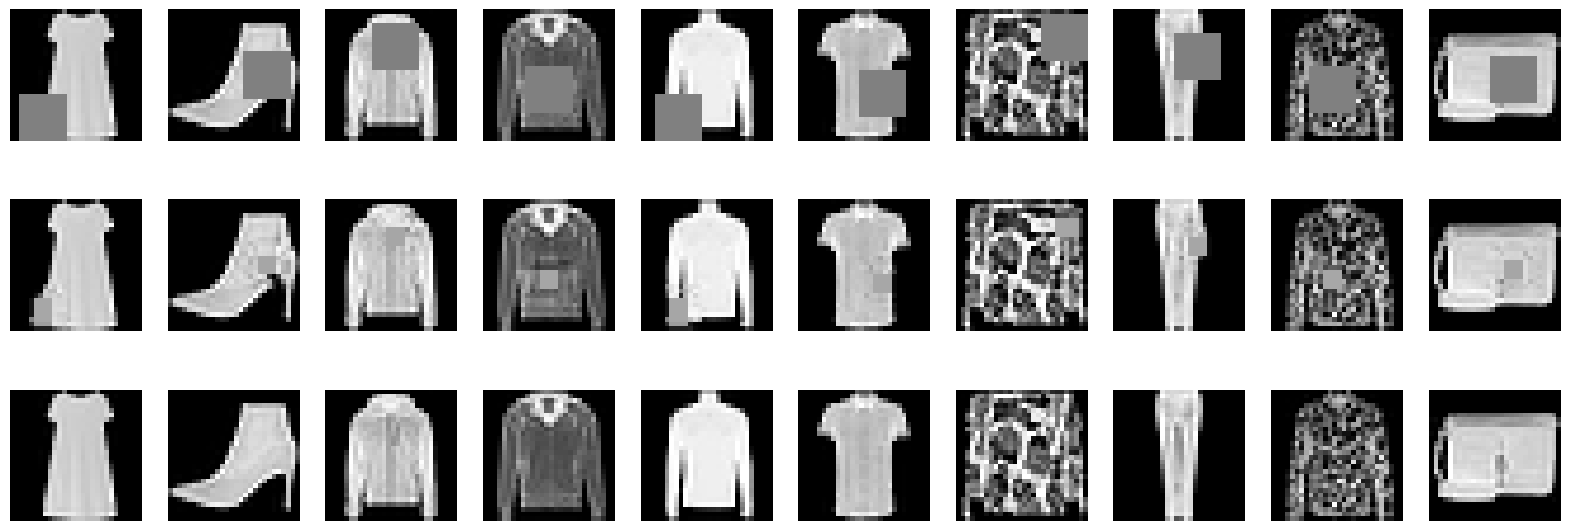

In [30]:
generator_inpaint = GeneratorInpaint().to(device)
generator_inpaint.load_state_dict(torch.load("models/saved/inpainting_gan/generator.pth"))
generator_inpaint = generator_inpaint.to(device)

show_test_images(generator_inpaint, device)

### Wykorzystanie VAE do inpaintingu

In [35]:
class VAEInpaint(nn.Module):
    def __init__(self, latent_dim=20):
        super(VAEInpaint, self).__init__()
        self.latent_dim = latent_dim

        # Encoder
        self.encoder = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28 * 28, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.ReLU()
        )
        self.fc_mu = nn.Linear(256, latent_dim)
        self.fc_logvar = nn.Linear(256, latent_dim)

        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 28 * 28),
            nn.Tanh()
        )

    def encode(self, x):
        h = self.encoder(x)
        mu = self.fc_mu(h)
        logvar = self.fc_logvar(h)
        return mu, logvar

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def decode(self, z):
        return self.decoder(z).view(-1, 1, 28, 28)

    def forward(self, x):
        mu, logvar = self.encode(x)
        z = self.reparameterize(mu, logvar)
        recon_x = self.decode(z)
        return recon_x, mu, logvar

In [36]:
def vae_loss_function(recon_x, x, mu, logvar):
    BCE = nn.functional.mse_loss(recon_x, x, reduction='sum')
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return BCE + KLD

In [37]:
def train_vae(model, train_loader, epochs=10, lr=1e-3):
    optimizer = optim.Adam(model.parameters(), lr=lr)
    model.train()

    for epoch in range(epochs):
        train_loss = 0
        for masked_imgs, original_imgs, _ in train_loader:
            masked_imgs, original_imgs = masked_imgs.to(device), original_imgs.to(device)
            optimizer.zero_grad()
            recon_imgs, mu, logvar = model(masked_imgs)
            loss = vae_loss_function(recon_imgs, original_imgs, mu, logvar)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()

        print(f"Epoch [{epoch+1}/{epochs}], Loss: {train_loss / len(train_loader.dataset):.4f}")


In [38]:
def test_vae(model, test_loader):
    model.eval()
    with torch.no_grad():
        for masked_imgs, original_imgs, masks in test_loader:
            masked_imgs, original_imgs = masked_imgs.to(device), original_imgs.to(device)
            recon_imgs, _, _ = model(masked_imgs)

            n = 8
            plt.figure(figsize=(15, 5))
            for i in range(n):
                # Original
                plt.subplot(3, n, i+1)
                plt.imshow(original_imgs[i].squeeze().cpu(), cmap="gray")
                plt.axis("off")
                if i == 0: plt.title("Original")

                # Masked
                plt.subplot(3, n, i+1+n)
                plt.imshow(masked_imgs[i].squeeze().cpu(), cmap="gray")
                plt.axis("off")
                if i == 0: plt.title("Masked")

                # Reconstructed
                plt.subplot(3, n, i+1+2*n)
                plt.imshow(recon_imgs[i].squeeze().cpu(), cmap="gray")
                plt.axis("off")
                if i == 0: plt.title("Reconstructed")

            plt.show()
            break


In [39]:
batch_size = 128
train_loader = torch.utils.data.DataLoader(MaskedFashionMNIST(train=True), batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(MaskedFashionMNIST(train=False), batch_size=batch_size, shuffle=False)

latent_dim = 20
vae_inpaint = VAEInpaint(latent_dim).to(device)

In [ ]:
train_vae(vae_inpaint, train_loader, epochs=10, lr=1e-3)

In [ ]:
test_vae(vae_inpaint, test_loader)

## Generowanie obrazów 2D

## Literatura
1. [What is Generative AI] (https://www.nvidia.com/en-us/glossary/generative-ai/#:~:text=Generative%20AI%20models%20can%20take,or%20turn%20video%20into%20text.)
2. [Generative Adversarial Networks] (Ian J. Goodfellow, Jean Pouget-Abadie, Mehdi Mirza, Bing Xu, David Warde-Farley, Sherjil Ozair, Aaron Courville, Yoshua Bengio. Generative Adversarial Networks. arXiv:1406.2661)
3. [Variational Autoencoders] (Diederik P. Kingma, Max Welling. Auto-Encoding Variational Bayes. arXiv:1312.6114) 
4. [Variational Autoencoders] (Diederik P. Kingma, Max Welling. An Introduction to Variational Autoencoders. arXiv:1906.02691)
5. [Diffusion Models] (Ling Yang, Zhilong Zhang, Yang Song, Shenda Hong, Runsheng Xu, Yue Zhao, Wentao Zhang, Bin Cui, Ming-Hsuan Yang. Diffusion Models: A Comprehensive Survey of Methods and Applications. arXiv:2209.00796)